# Εισάγουμε τις απαραίτητες βιβλιοθήκες

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

## Εισάγουμε τα δεδομένα και κρατάμε τις στήλες που χρειαζόμαστε

In [72]:
skai_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/skai_emvolio.csv")

In [73]:
skai_df= skai_df[['title' , 'date' , 'summary' , 'body']]

In [58]:
skai_df.head()

In [74]:
len(skai_df)

1795

In [75]:
star_df = pd.read_csv("https://raw.githubusercontent.com/stavrouk/Stavrou_Teliki_Ergasia/main/Scraping/star_emvolio.csv")

In [76]:
star_df= star_df[['title' , 'date' , 'summary' , 'body']]

In [59]:
star_df.head()

In [77]:
len(star_df)

509

## Αλλάζουμε το date σε datetime και δημιουργούμε 3 νέες στήλες (ημέρα, μήνας, έτος)

In [78]:
skai_df['date'] = pd.to_datetime(skai_df['date'], format='%d/%m/%Y - %H:%M')
skai_df['date']

0      2021-04-14 01:09:00
1      2021-05-19 16:04:00
2      2021-03-05 20:10:00
3      2021-02-01 09:34:00
4      2020-12-31 09:46:00
               ...        
1790   2021-01-07 18:38:00
1791   2021-02-18 13:14:00
1792   2021-03-16 10:03:00
1793   2021-03-24 17:53:00
1794   2021-03-12 17:42:00
Name: date, Length: 1795, dtype: datetime64[ns]

In [79]:
#Αλλάζουμε το format του έτους στο date για να μπορεί να αναγνωστεί ως %Y και να μετατραπεί σε datetime
star_df['date'] = star_df['date'].str.replace("20,", "2020,")
star_df['date'] = star_df['date'].str.replace("21,", "2021,")

In [80]:
star_df['date'] = pd.to_datetime(star_df['date'], format='%d.%m.%Y, %H:%M')
star_df['date']

0     2021-03-01 19:02:00
1     2021-02-19 10:53:00
2     2021-01-24 15:00:00
3     2021-01-04 16:09:00
4     2021-03-19 19:38:00
              ...        
504   2021-01-04 12:00:00
505   2021-06-16 10:13:00
506   2021-06-04 11:32:00
507   2021-05-31 19:51:00
508   2021-03-04 13:37:00
Name: date, Length: 509, dtype: datetime64[ns]

In [81]:
skai_df['year'] = pd.DatetimeIndex(skai_df['date']).year
skai_df['month'] = pd.DatetimeIndex(skai_df['date']).month
skai_df['day'] = pd.DatetimeIndex(skai_df['date']).day

In [82]:
star_df['year'] = pd.DatetimeIndex(star_df['date']).year
star_df['month'] = pd.DatetimeIndex(star_df['date']).month
star_df['day'] = pd.DatetimeIndex(star_df['date']).day

## Καθαρίζουμε τα άρθρα από περιττά στοιχεία και διαλέγουμε τα άρθρα που δημοσιεύτηκαν το 2021

In [83]:
skai_df['body'] = skai_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [84]:
star_df['body'] = star_df['body'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [85]:
star_df['body'] = star_df['body'].str.replace('googletag',' ').str.replace('ad',' ').str.replace('gpt',' ').str.replace('function',' ').str.replace('div',' ').str.replace('display',' ').str.replace('cmd',' ').str.replace('push',' ').str.replace('1618837763216',' ')

In [86]:
star_df['body'] = star_df['body'].str.replace('\n'," ")
star_df['body'] = star_df['body'].str.replace('\xa0'," ")
skai_df['body'] = skai_df['body'].str.replace('\n'," ")

In [87]:
star_df = star_df[star_df['year'] == 2021]

In [88]:
skai_df = skai_df[skai_df['year'] == 2021]

In [60]:
skai_df.head()

In [89]:
len(skai_df)

1659

In [61]:
star_df.head()

In [90]:
len(star_df)

469

# Ορίζουμε την ημερομηνία ως index και δημιουργούμε τα πρώτα γραφήματα

In [91]:
skai_df.set_index('date' , inplace=True)
star_df.set_index('date' , inplace=True)

In [92]:
#Κάνουμε sort για να φαίνονται τα άρθρα ανάλογα με την ημερομηνία δημοσίευσης 
skai_df = skai_df.sort_index()
star_df = star_df.sort_index()

In [93]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month')

month
1    383
2    312
3    306
5    250
4    240
6    168
dtype: int64

In [94]:
#Ο αριθμός των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month')

month
5    109
4     97
1     82
3     66
6     64
2     51
dtype: int64

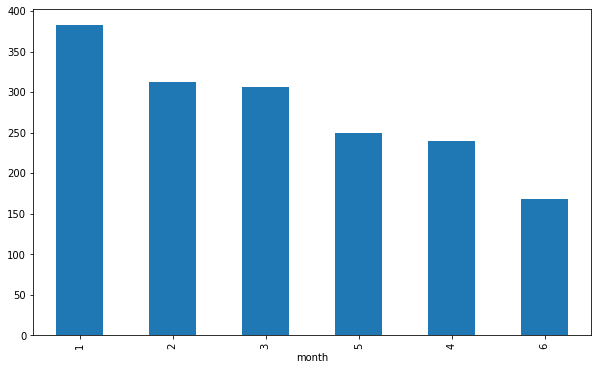

In [95]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6))

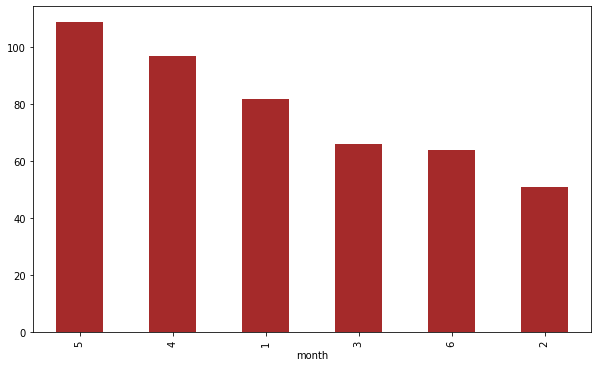

In [96]:
#Γράφημα με τον αριθμό των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['2021-01': ].value_counts('month').plot(kind= 'bar', figsize= (10,6), color= 'brown')

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Skai
skai_df['month'].value_counts().sort_values(ascending= False).mean()

276.5

In [ ]:
#Ο μέσος όρος των δημοσιευμένων άρθρων για τα εμβόλια, ανά μήνα στο Star
star_df['month'].value_counts().sort_values(ascending= False).mean()

78.16666666666667

## Φτιάχνουμε το WordCloud από τα κείμενα των τίτλων και των περιγραφών

In [97]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
skai_df["text"] = skai_df["title"] + skai_df["summary"]

In [98]:
#Δημιουργούμε νέα στήλη με το κείμενο του τίτλου και της περιγραφής, των άρθρων
star_df["text"] = star_df["title"] + star_df["summary"]

In [99]:
from wordcloud import WordCloud, STOPWORDS

In [100]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
skaitext = skai_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [101]:
#Καθαρίζουμε το κείμενο από περιττούς χαρακτήρες
startext = star_df['text'].replace("amp", ' ').str.replace('AMP',' ').str.replace('Amp',' ').str.replace('links',' ').str.replace("RT", " ").str.replace('@',' ').str.replace('http',' ').str.replace('https',' ').str.replace('rt',' ').str.cat(sep = ' ')

In [139]:
skaitext

In [140]:
startext

In [104]:
#Εισάγουμε την απαραίτητη βιβλιοθήκη και το ελληνικό λεξικό
import spacy

In [105]:
#!python -m spacy download el_core_news_sm

In [106]:
nlp = spacy.load('el_core_news_sm')

In [107]:
list(nlp.Defaults.stop_words)[0:20]

['αλλού',
 'πολλοί',
 'ταύτη',
 'έγιναν',
 'πότε',
 'πολλές',
 'όσον',
 'πόσην',
 'μείον',
 'προς',
 'όσος',
 'οποιδήποτε',
 'όλον',
 'άξαφνα',
 'δα',
 'ακόμα',
 'όλην',
 'αυτή',
 'ετούτα',
 'όλους']

In [ ]:
full_doc1 = nlp(skaitext)

In [ ]:
full_doc2 = nlp(startext)

In [ ]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc1)

In [ ]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc2)

In [ ]:
#Φτιάχνουμε το Wordcloud του Skai
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Φτιάχνουμε το Wordcloud του Star
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Δημιουργούμε διαγράμματα με τις πιο συχνές λέξεις στο βασικό κείμενο των άρθρων

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [109]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20)
count_vector1 = cv.fit_transform(skai_df['body'])
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names()) 
results1.head()


,000,19,astrazeneca,covid,pfizer,δήλωσε,δόσεις,δόση,δύο,εμβολίου,εμβολίων,εμβολιασμού,εμβόλια,εμβόλιο,ετών,πηγή,σήμερα,σύμφωνα,υγείας,χώρες
0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,2,0,1,0,0,0,2,0,0,2,0,1,0,1,0,1,0,0,0,0
2,0,2,1,2,1,0,0,0,1,0,0,0,2,1,0,1,1,1,0,0
3,5,0,0,1,0,0,0,0,1,1,0,0,1,9,1,1,2,0,3,2
4,0,2,0,2,2,1,1,0,0,1,1,0,1,5,0,1,0,0,2,3


In [110]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20)
count_vector2 = cv.fit_transform(star_df['body'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv.get_feature_names()) 
results2.head()


,19,astrazeneca,covid,johnson,pfizer,διαβάστε,δόσεις,δόση,ειδήσεις,ελλάδα,εμβολίου,εμβολίων,εμβολιασμό,εμβόλια,εμβόλιο,ετών,κορωνοϊού,κόσμο,ραντεβού,υγείας
0,0,2,0,0,4,1,3,0,1,1,6,3,0,4,8,0,3,1,0,1
1,0,0,0,0,3,2,0,0,2,1,1,1,0,0,2,0,2,1,0,1
2,0,0,0,0,0,1,0,1,1,2,1,0,1,0,0,0,2,1,0,2
3,0,0,1,0,1,1,0,0,1,1,0,1,1,0,4,0,1,2,0,1
4,1,2,1,0,0,1,0,0,1,1,1,0,0,0,8,0,1,1,0,1


In [111]:
results1.sum(axis =0).sort_values(ascending = False)

εμβόλιο        3458
εμβολίου       2345
covid          1996
19             1871
εμβόλια        1820
πηγή           1627
υγείας         1561
astrazeneca    1493
εμβολίων       1469
δόσεις         1291
σήμερα         1189
δόση           1149
ετών           1091
pfizer         1083
δύο            1081
000             977
χώρες           972
δήλωσε          966
σύμφωνα         961
εμβολιασμού     959
dtype: int64

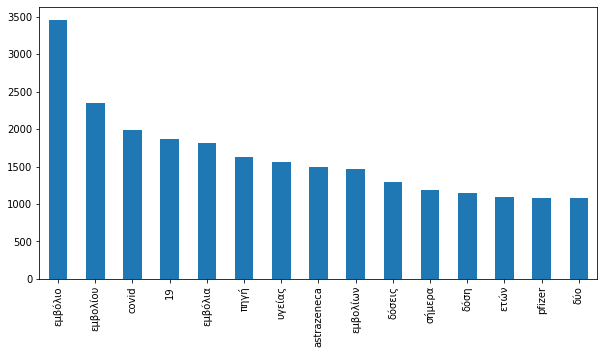

In [112]:
#Φτιάχνουμε γράφημα με τις 15 συχνότερες λέξεις στο κείμενο του Skai
results1.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize=(10,5))

In [113]:
results2.sum(axis =0).sort_values(ascending = False)

εμβόλιο        1764
astrazeneca     974
εμβολίου        796
ελλάδα          622
ετών            600
διαβάστε        553
κόσμο           539
δόση            520
εμβόλια         493
ειδήσεις        493
pfizer          471
johnson         463
εμβολιασμό      418
ραντεβού        402
covid           372
19              368
κορωνοϊού       368
δόσεις          341
υγείας          339
εμβολίων        329
dtype: int64

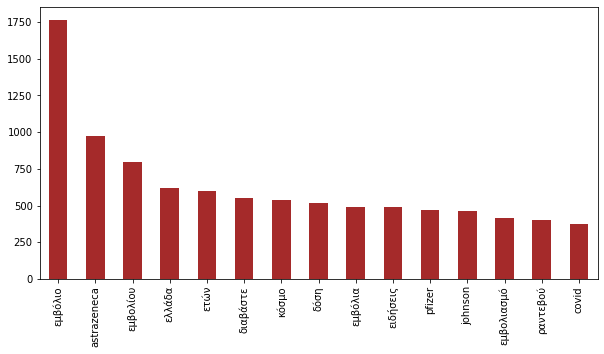

In [114]:
#Φτιάχνουμε γράφημα με τις 15 συχνότερες λέξεις στο κείμενο του Star
results2.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize=(10,5), color= 'brown')

## Δημιουργούμε διαγράμματα με τα πιο συχνά διγράμματα στο βασικό κείμενο των άρθρων

In [115]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector1 = cv.fit_transform(skai_df['body'])
results1 = pd.DataFrame(count_vector1.toarray(), columns=cv.get_feature_names()) 
results1.head()

,covid 19,html5 video,johnson johnson,pfizer biontech,sars cov,skai gr,view this,απε μπε,δεύτερη δόση,δόσεις εμβολίου,δόση εμβολίου,εκατομμύρια δόσεις,εμβολίου astrazeneca,εμβόλιο astrazeneca,εμβόλιο pfizer,ηνωμένο βασίλειο,κυριάκος μητσοτάκης,πηγή skai,πηγή απε,υπουργός υγείας
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0
2,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,0,2,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0


In [116]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) 
count_vector2 = cv.fit_transform(star_df['body'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv.get_feature_names()) 
results2.head()

,60 ετών,covid 19,gov gr,johnson johnson,pfizer biontech,δελτίο ειδήσεων,δεύτερη δόση,διαβάστε lifestyle,διαβάστε ειδήσεις,δόσεις εμβολίου,δόση εμβολίου,ειδήσεις ελλάδα,ειδήσεων star,ελλάδα κόσμο,εμβολίου astrazeneca,εμβόλιο astrazeneca,εμβόλιο johnson,εμβόλιο pfizer,εμβόλιο κορωνοϊού,ηλικιακή ομάδα
0,0,0,0,0,2,0,0,0,1,2,0,1,0,1,0,1,0,1,0,0
1,0,0,0,0,2,0,0,0,2,0,0,1,0,1,0,0,0,2,0,0
2,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [117]:
results1.sum(axis =0).sort_values(ascending = False)

covid 19                1753
απε μπε                  881
πηγή απε                 850
skai gr                  638
πηγή skai                620
εμβόλιο astrazeneca      491
pfizer biontech          419
sars cov                 378
δόση εμβολίου            370
johnson johnson          369
δεύτερη δόση             353
δόσεις εμβολίου          316
εκατομμύρια δόσεις       276
υπουργός υγείας          267
κυριάκος μητσοτάκης      264
εμβολίου astrazeneca     250
εμβόλιο pfizer           208
view this                206
ηνωμένο βασίλειο         201
html5 video              200
dtype: int64

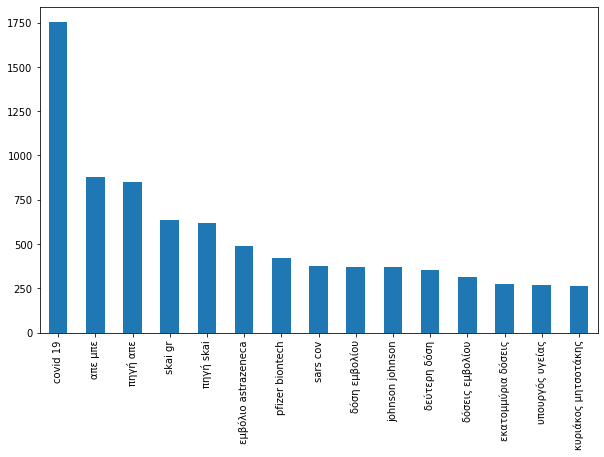

In [118]:
#Φτιάχνουμε γράφημα με τα 15 συχνότερα διγράμματα στο κείμενο του Skai
results1.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize= (10,6))

In [119]:
results2.sum(axis =0).sort_values(ascending = False)

διαβάστε ειδήσεις       473
ελλάδα κόσμο            469
ειδήσεις ελλάδα         425
εμβόλιο astrazeneca     411
covid 19                332
johnson johnson         230
δόση εμβολίου           168
δεύτερη δόση            165
ειδήσεων star           135
εμβόλιο pfizer          128
pfizer biontech         124
εμβόλιο johnson         110
δελτίο ειδήσεων         109
εμβολίου astrazeneca    101
ηλικιακή ομάδα           85
60 ετών                  85
διαβάστε lifestyle       77
δόσεις εμβολίου          75
εμβόλιο κορωνοϊού        73
gov gr                   72
dtype: int64

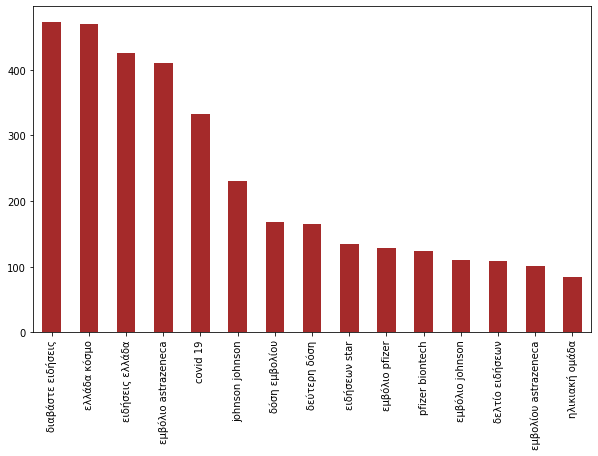

In [120]:
#Φτιάχνουμε γράφημα με τα 15 συχνότερα διγράμματα στο κείμενο του Star
results2.sum(axis =0).sort_values(ascending = False).head(15).plot(kind= 'bar', figsize= (10,6), color= 'brown')

## Βρίσκουμε την ομοιότητα των κειμένων

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
tfidf_vectorizer1 = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train1 = tfidf_vectorizer1.fit_transform(skai_df['body']) 

In [123]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train2 = tfidf_vectorizer2.fit_transform(star_df['body'])  

In [124]:
results1 = pd.DataFrame(tfidf_matrix_train1.toarray(), columns=tfidf_vectorizer1.get_feature_names()) 
results1.head()

,00,000,10,100,11,12,14,15,16,17,18,19,20,200,2020,2021,21,24,25,27,30,40,50,500,55,60,65,70,80,90,and,astrazeneca,biontech,browser,cdc,consider,cov,covid,ema,enable,...,τομέα,τουρκία,τρίτο,τρόπο,τόνισε,τύπου,υγεία,υγείας,υπάρξει,υπάρχει,υπάρχουν,υπηρεσία,υπογράμμισε,υπουργείο,υπουργείου,υπουργός,φάση,φαίνεται,φαρμάκων,φεβρουαρίου,φορά,φορές,χαρακτηριστικά,χθες,χορήγηση,χορηγείται,χορηγηθεί,χρήση,χρήσης,χρειάζεται,χρειαστεί,χρόνια,χρόνο,χωρών,χώρα,χώρας,χώρες,χώρους,ψηφιακό,ώρα
0,0.482067,0.060411,0.0,0.0,0.0,0.077286,0.0,0.080478,0.0,0.0,0.0,0.043354,0.000000,0.0,0.094864,0.234230,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.042575,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.046726,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.085908,0.000000,0.054528,0.0,0.000000,0.099632,0.0,0.252778
1,0.000000,0.191188,0.0,0.0,0.0,0.000000,0.0,0.127348,0.0,0.0,0.0,0.000000,0.000000,0.0,0.150113,0.123549,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.081484,0.103399,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.148756,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.094053,0.0,0.161562,0.0,0.0,0.0,0.0,0.0,0.0,0.101974,0.0,0.000000,0.000000,0.0,0.115492,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.149769,0.000000,0.000000,0.086285,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.095469,0.000000,0.0,0.000000,0.171929,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.112099,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.056696,0.071945,0.0,0.0,0.0,0.0,0.093754,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.205179,0.0,0.07787,0.000000,0.000000,0.0,0.104209,0.000000,0.000000,0.120074,0.0,0.000000,0.000000,0.0,0.092772
3,0.000000,0.324083,0.0,0.0,0.0,0.000000,0.0,0.086347,0.0,0.0,0.0,0.000000,0.089635,0.0,0.000000,0.083771,0.0,0.0,0.0,0.0,0.086618,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.105263,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.045681,0.0,0.0,...,0.000000,0.0,0.0,0.093188,0.000000,0.0,0.0,0.150400,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.382833,0.111459,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.203099,0.184348,0.000000,0.000000,0.0,0.128886,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.112369,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.115149,0.000000,0.0,0.000000,0.169361,0.0,0.0,0.0,0.0,0.110350,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.078976,0.0,0.0,0.121106,0.0,0.000000,0.0,0.264627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.115601,0.000000,0.0,0.000000,0.0,0.120750,0.0,0.00000,0.126196,0.116523,0.0,0.000000,0.000000,0.122937,0.000000,0.0,0.233512,0.000000,0.0,0.000000


In [125]:
results2 = pd.DataFrame(tfidf_matrix_train2.toarray(), columns=tfidf_vectorizer2.get_feature_names()) 
results2.head()

,000,10,100,11,12,14,15,16,1618837894283,17,18,19,1η,20,2021,21,24,25,27,28,29,2η,30,39,40,44,45,50,55,60,64,65,70,75,80,85,95,ap,astrazeneca,biontech,...,τόνισε,τύπου,υγείας,υπάρξει,υπάρχει,υπάρχουν,υπενθυμίζεται,υπερτερούν,υπηρεσία,υπουργείο,υπουργείου,υπουργός,φάρμακα,φάση,φαίνεται,φαρμάκων,φαρμακευτική,φεβρουαρίου,φορά,φορές,φροντίδας,φως,φωτογραφία,χαρακτηριστικά,χθες,χορήγηση,χορηγείται,χορηγηθεί,χρήση,χρήσης,χρειαστεί,χρονικό,χρόνια,χρόνο,χώρα,χώρας,χώρες,όρους,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.064504,0.0,0.000000,0.0,0.085646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075629,0.0,0.0,0.0,0.0,0.0,0.075032,0.400054,...,0.060120,0.0,0.039498,0.0,0.056920,0.062058,0.0,0.0,0.0,0.000000,0.000000,0.074077,0.00000,0.0,0.148153,0.052949,0.084016,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.059597,0.0,0.085646,0.0,0.0,0.0,0.048623,0.0,0.060120,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.174806,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.246432,...,0.000000,0.0,0.085158,0.0,0.000000,0.133796,0.0,0.0,0.0,0.349613,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.127935,0.133176,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.104831,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.167927,0.0,0.120998,0.131919,0.0,0.0,0.0,0.000000,0.156417,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152725,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.222593,0.0,0.073121,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.15855,0.0,0.137133,0.000000,0.000000,0.0,0.0,0.15855,0.148845,0.0,0.0,0.40597,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.090013,0.0,0.111296,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090341,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.153718,0.000000,...,0.000000,0.0,0.080921,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [127]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train1, tfidf_matrix_train1))

cosine scores ==>  [[1.         0.14151248 0.11888362 ... 0.11770786 0.07270471 0.01784754]
 [0.14151248 1.         0.1043473  ... 0.14719201 0.07521117 0.02802382]
 [0.11888362 0.1043473  1.         ... 0.17325706 0.05864835 0.03708303]
 ...
 [0.11770786 0.14719201 0.17325706 ... 1.         0.06809559 0.04229143]
 [0.07270471 0.07521117 0.05864835 ... 0.06809559 1.         0.02599269]
 [0.01784754 0.02802382 0.03708303 ... 0.04229143 0.02599269 1.        ]]


In [128]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train2, tfidf_matrix_train2))

cosine scores ==>  [[1.         0.34363245 0.1594616  ... 0.36736334 0.08182662 0.1599323 ]
 [0.34363245 1.         0.23569102 ... 0.2895042  0.07840581 0.13819954]
 [0.1594616  0.23569102 1.         ... 0.07164492 0.11973718 0.0652382 ]
 ...
 [0.36736334 0.2895042  0.07164492 ... 1.         0.07830831 0.25941461]
 [0.08182662 0.07840581 0.11973718 ... 0.07830831 1.         0.05450084]
 [0.1599323  0.13819954 0.0652382  ... 0.25941461 0.05450084 1.        ]]


In [129]:
arr1 = cosine_similarity(tfidf_matrix_train1, tfidf_matrix_train1)

In [130]:
arr2 = cosine_similarity(tfidf_matrix_train2, tfidf_matrix_train2)

## Δημιουργούμε τα δύο Heatmap

In [131]:
import seaborn as sb
from matplotlib.colors import ListedColormap

In [136]:
#Κάνουμε dataframe τις δύο λίστες με τα cosine scores
plt_df1 = pd.DataFrame(arr1)
plt_df2 = pd.DataFrame(arr2)

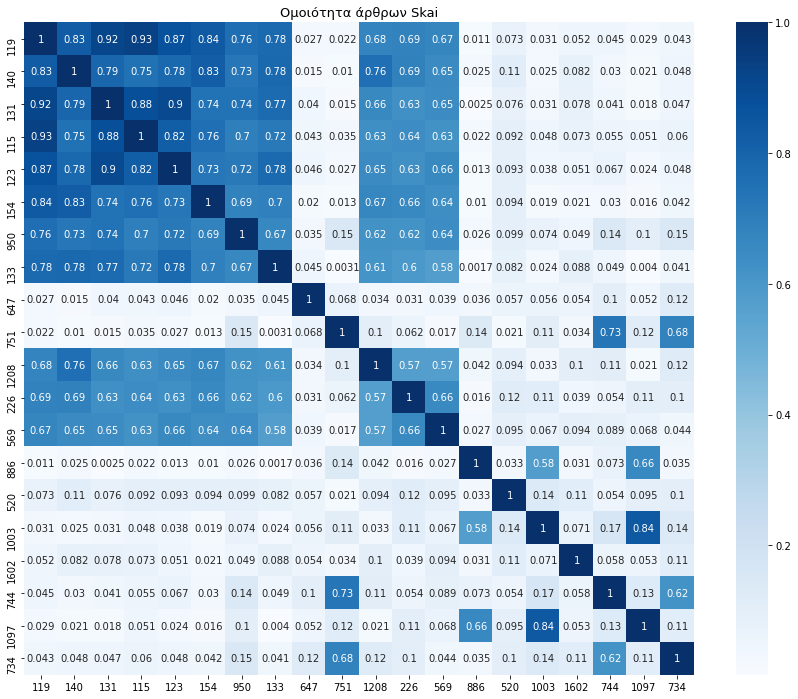

In [137]:
# Φτιάχνουμε το Heatmap του Skai

# Δημιουργούμε έναν πίνακα, ορίζοντας το index κάθε γραμμής από το df του plt_df1 (άρθρα του Skai).
# Στη συνέχεια βρίσκουμε τα 20 άρθρα με την μεγαλύτερη ομοιότητα και τα αθροίζουμε.
scores1 = []
for index, row in plt_df1.iterrows():
  scores1.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

# Ορίζουμε ως dataframe την συνθήκη που κάναμε πριν
scores1 = pd.DataFrame(scores1)

# Παίρνουμε τα 20 άρθρα από το dataframe scores1
top20scores1 = scores1.sort_values('similarity_score', ascending=False).head(20)

# Στη συνέχεια παίρουμε τα άρθρα, το index και τις στήλες από τα 20 άρθρα με τη μεγαλύτερη ομοιότητα.
top20similar1 =  plt_df1.loc[list(top20scores1['i'])][list(top20scores1.head(20)['i'])]

# Δημιουργούμε το Heatmap
plt.figure(figsize=(15,12))
sb.heatmap(top20similar1, annot=True, cmap=plt.cm.Blues)
plt.title('Ομοιότητα άρθρων Skai', fontsize=13)
plt.show()

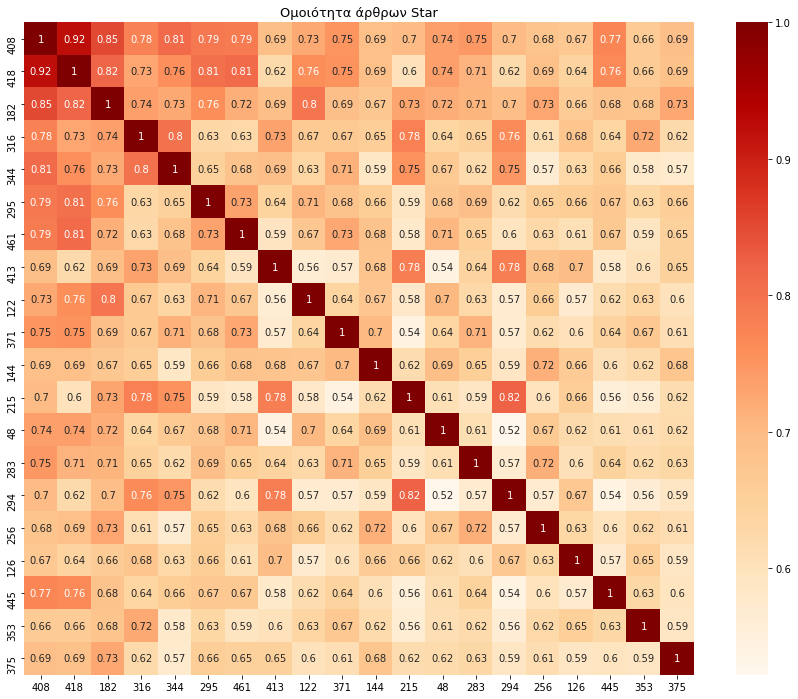

In [138]:
# Φτιάχνουμε το Heatmap του Star

# Κάνουμε την ίδια διαδικασία με πριν, αλλάζοντας το dataframe για να πάρουμε τα άρθρα του Star
scores2 = []
for index, row in plt_df2.iterrows():
  scores2.append({ 'i' : index, 'similarity_score': row.sort_values(ascending = False).head(20).sum()})

scores2 = pd.DataFrame(scores2)

top20scores2 = scores2.sort_values('similarity_score', ascending=False).head(20)

top20similar2 =  plt_df2.loc[list(top20scores2['i'])][list(top20scores2.head(20)['i'])]

plt.figure(figsize=(15,12))
sb.heatmap(top20similar2, annot=True, cmap=plt.cm.OrRd)
plt.title('Ομοιότητα άρθρων Star', fontsize=13)
plt.show()